In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [131]:
%matplotlib inline

In [132]:
df=pd.read_excel('C:/Users/sarni/OneDrive/Desktop/projects/HT.vsWT..xlsx')

In [133]:
df

,WEIGHTWEIGHT,HEIGHT
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


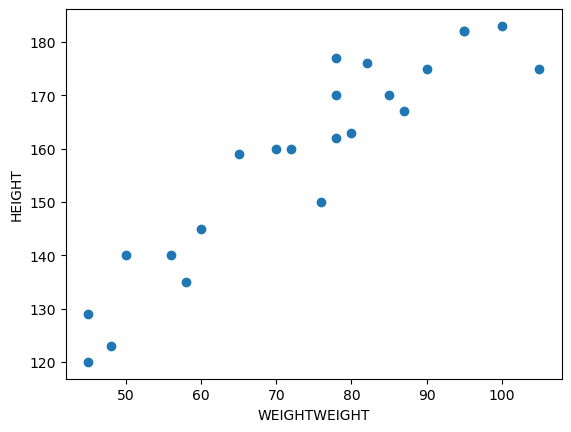

In [134]:
plt.scatter(df['WEIGHTWEIGHT'],df['HEIGHT'])
plt.xlabel('WEIGHTWEIGHT')
plt.ylabel('HEIGHT')

plt.show()

In [135]:
df.corr()

,WEIGHTWEIGHT,HEIGHT
WEIGHTWEIGHT,1.000000,0.931142
HEIGHT,0.931142,1.000000


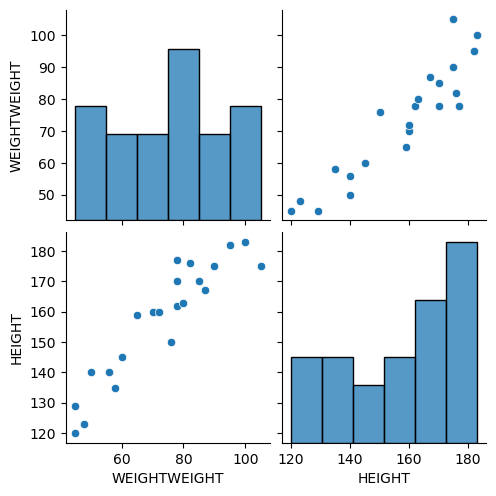

In [136]:
import seaborn as sns

sns.pairplot(df)
plt.show()



## INDEPENDENT AND DEPENDENT FEATURE

In [137]:
X=df[['WEIGHTWEIGHT']] ## INDEPENDENT FEATURE SHOULD BE IN 2D
np.array(X).shape

(23, 1)

In [138]:
X_series=df['WEIGHTWEIGHT']
np.array(X_series).shape

(23,)

In [139]:
y=df['HEIGHT']  ## DEPENDENT FEATURE
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: HEIGHT, dtype: int64

### TRAIN TEST SPLIT(FOR CHECKING UNDERFITTING AND OVERFITTING CONDITION)

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [141]:
X_train.shape

(17, 1)

### STANDARDIZATION OF DATA

In [142]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [143]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

### LINEAR REGRESSION

In [144]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [145]:
regression.coef_

array([1.04792503])

In [146]:
regression.intercept_

80.52684512622542

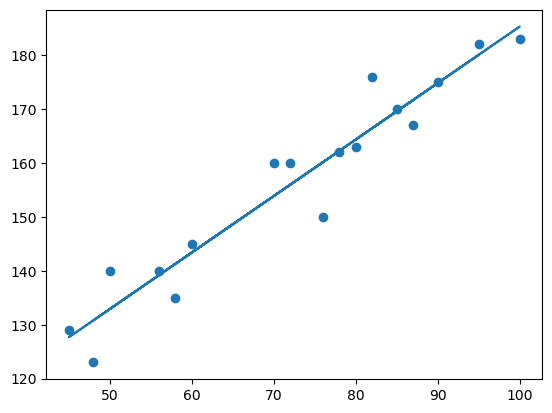

In [147]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

### PREDICTION FOR TEST DATA

# pred. height output=intercept+ coef. of (weights)
# y_pred_test= 80.52+1.04(x_test)

In [148]:
y_pred=regression.predict(X_test)

c:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Performance Metrics

In [149]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7276.932884039703
82.97662409755102
85.3049405605543


### R-SQUARE AND ADJUSTED R-SQUARE

In [150]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

-15.723241865651406


### OLS Linear Regression

In [151]:
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()


In [152]:
PREDICTION=model.predict(X_test)
PREDICTION

array([ 0.70487577,  0.70487577, -3.5018828 ,  2.87199382, -0.95233215,
        4.14676914])

In [153]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 HEIGHT   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Fri, 23 May 2025   Prob (F-statistic):                    2.80e-16
Time:                        14:51:14   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

c:\conda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


### PREDICTION FOR NEW DATA

In [155]:
regression.predict([[80]])

c:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([164.36084726])